<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Bárbara Aguayo
- Nombre de alumno 2: Camila Figueroa

### **Link de repositorio de GitHub:** `https://github.com/bluemili/MDS7202-Labs.git`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except:
#    print('Ignorando conexión drive-colab')

In [40]:
# Carga de datos
from google.colab import files
uploaded = files.upload()

Saving fruit_vegetables.csv to fruit_vegetables.csv


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [41]:
# Leer el dataset
df_vegs = pd.read_csv("/content/fruit_vegetables.csv")
df_vegs

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


In [42]:
df_vegs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [43]:
df_vegs.describe()

,SN,Minimum,Maximum,Average
count,197161.000000,197161.000000,197161.000000,197161.000000
mean,98580.000000,85.423938,94.161284,89.792611
std,56915.622549,77.058896,82.375858,79.619003
min,0.000000,1.000000,6.000000,5.000000
25%,49290.000000,40.000000,45.000000,42.500000
50%,98580.000000,60.000000,70.000000,65.000000
75%,147870.000000,100.000000,110.000000,105.000000
max,197160.000000,1800.000000,2000.000000,1900.000000


In [44]:
print(df_vegs.isna().sum())

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64


In [45]:
df_vegs['Date'] = pd.to_datetime(df_vegs['Date'])
df_vegs

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


In [46]:
df_vegs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   SN         197161 non-null  int64         
 1   Commodity  197161 non-null  object        
 2   Date       197161 non-null  datetime64[ns]
 3   Unit       197161 non-null  object        
 4   Minimum    197161 non-null  float64       
 5   Maximum    197161 non-null  float64       
 6   Average    197161 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 10.5+ MB


In [47]:
# Crear máscara con elementos de búsqueda y seleccionar
sorted(df_vegs['Commodity'].unique())

['Apple(Fuji)',
 'Apple(Jholey)',
 'Arum',
 'Asparagus',
 'Bakula',
 'Bamboo Shoot',
 'Banana',
 'Barela',
 'Bauhania flower',
 'Bitter Gourd',
 'Bottle Gourd',
 'Brd Leaf Mustard',
 'Brinjal Long',
 'Brinjal Round',
 'Brocauli',
 'Cabbage',
 'Cabbage(Local)',
 'Cabbage(Terai)',
 'Capsicum',
 'Carrot(Local)',
 'Carrot(Terai)',
 'Cauli Local',
 'Cauli Local(Jyapu)',
 'Cauli Terai',
 'Celery',
 'Chilli Dry',
 'Chilli Green',
 'Chilli Green(Akbare)',
 'Chilli Green(Bullet)',
 'Chilli Green(Machhe)',
 'Christophine',
 'Clive Dry',
 'Clive Green',
 'Coriander Green',
 'Cow pea(Long)',
 'Cowpea(Short)',
 'Cress Leaf',
 'Cucumber(Hybrid)',
 'Cucumber(Local)',
 'Drumstick',
 'Fennel Leaf',
 'Fenugreek Leaf',
 'Fish Fresh',
 'Fish Fresh(Bachuwa)',
 'Fish Fresh(Chhadi)',
 'Fish Fresh(Mungari)',
 'Fish Fresh(Rahu)',
 'French Bean(Hybrid)',
 'French Bean(Local)',
 'French Bean(Rajma)',
 'Garlic Dry Chinese',
 'Garlic Dry Nepali',
 'Garlic Green',
 'Ginger',
 'Grapes(Black)',
 'Grapes(Green)',
 'Gr

In [48]:
#Tomates, Lechuga, Manzana, Plantanos, Tofu
#Como prefiere productos locales se deja únicamente 'Tomato Small(Local)' y se elige una de las manzanas ('Apple(Jholey)')
items = ['Tomato Small(Local)', 'Lettuce', 'Banana', 'Tofu', 'Apple(Jholey)']
mask = df_vegs['Commodity'].isin(items)
selected_items = df_vegs[mask]

selected_items

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
...,...,...,...,...,...,...,...
197038,197038,Banana,2021-05-12,Doz,100.0,110.0,105.0
197072,197072,Tomato Small(Local),2021-05-13,Kg,35.0,40.0,37.5
197120,197120,Lettuce,2021-05-13,Kg,50.0,60.0,55.0
197126,197126,Tofu,2021-05-13,Kg,90.0,100.0,95.0


In [49]:
selected_items['Commodity'].unique()

array(['Tomato Small(Local)', 'Lettuce', 'Tofu', 'Apple(Jholey)',
       'Banana'], dtype=object)

In [50]:
# Graficar serie de tiempo
import plotly.express as px

fig = px.line(selected_items, x='Date', y='Average', color='Commodity',
              title='Precio promedio de frutas y verduras seleccionadas a lo largo del tiempo',
              labels={'Average': 'Precio Promedio', 'Date': 'Fecha', 'Commodity': 'Producto'})

fig.update_layout(xaxis_title='Fecha',
                  yaxis_title='Precio Promedio',
                  legend_title="Producto")

fig.show()

In [51]:
daily_sum = selected_items.groupby('Date')['Average'].sum()
df_daily_sum = pd.DataFrame({'ds': daily_sum.index, 'y': daily_sum.values})

In [52]:
df_daily_sum

,ds,y
0,2013-06-16,329.0
1,2013-06-17,322.5
2,2013-06-18,309.0
3,2013-06-19,331.0
4,2013-06-20,319.0
...,...,...
2746,2021-05-09,257.5
2747,2021-05-10,257.5
2748,2021-05-11,257.5
2749,2021-05-12,552.5


In [53]:
fig = px.line(df_daily_sum, x='ds', y='y',
              title='Suma de promedios del precio de frutas y verduras seleccionadas a lo largo del tiempo',
              labels={'y': 'Suma Promedios', 'ds': 'Fecha'})

fig.update_layout(xaxis_title='Fecha',
                  yaxis_title='Precio Promedio')

fig.show()

In [54]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#df = pd.DataFrame({'data': df_daily_sum['suma_average'].values}, index=df_daily_sum['date'])
#= seasonal_decompose(df, model='additive', )

df_daily_sum.set_index('ds', inplace=True)

In [55]:
signal_decomposed = seasonal_decompose(df_daily_sum, model='additive', period = 365)

In [56]:
type(signal_decomposed)

statsmodels.tsa.seasonal.DecomposeResult

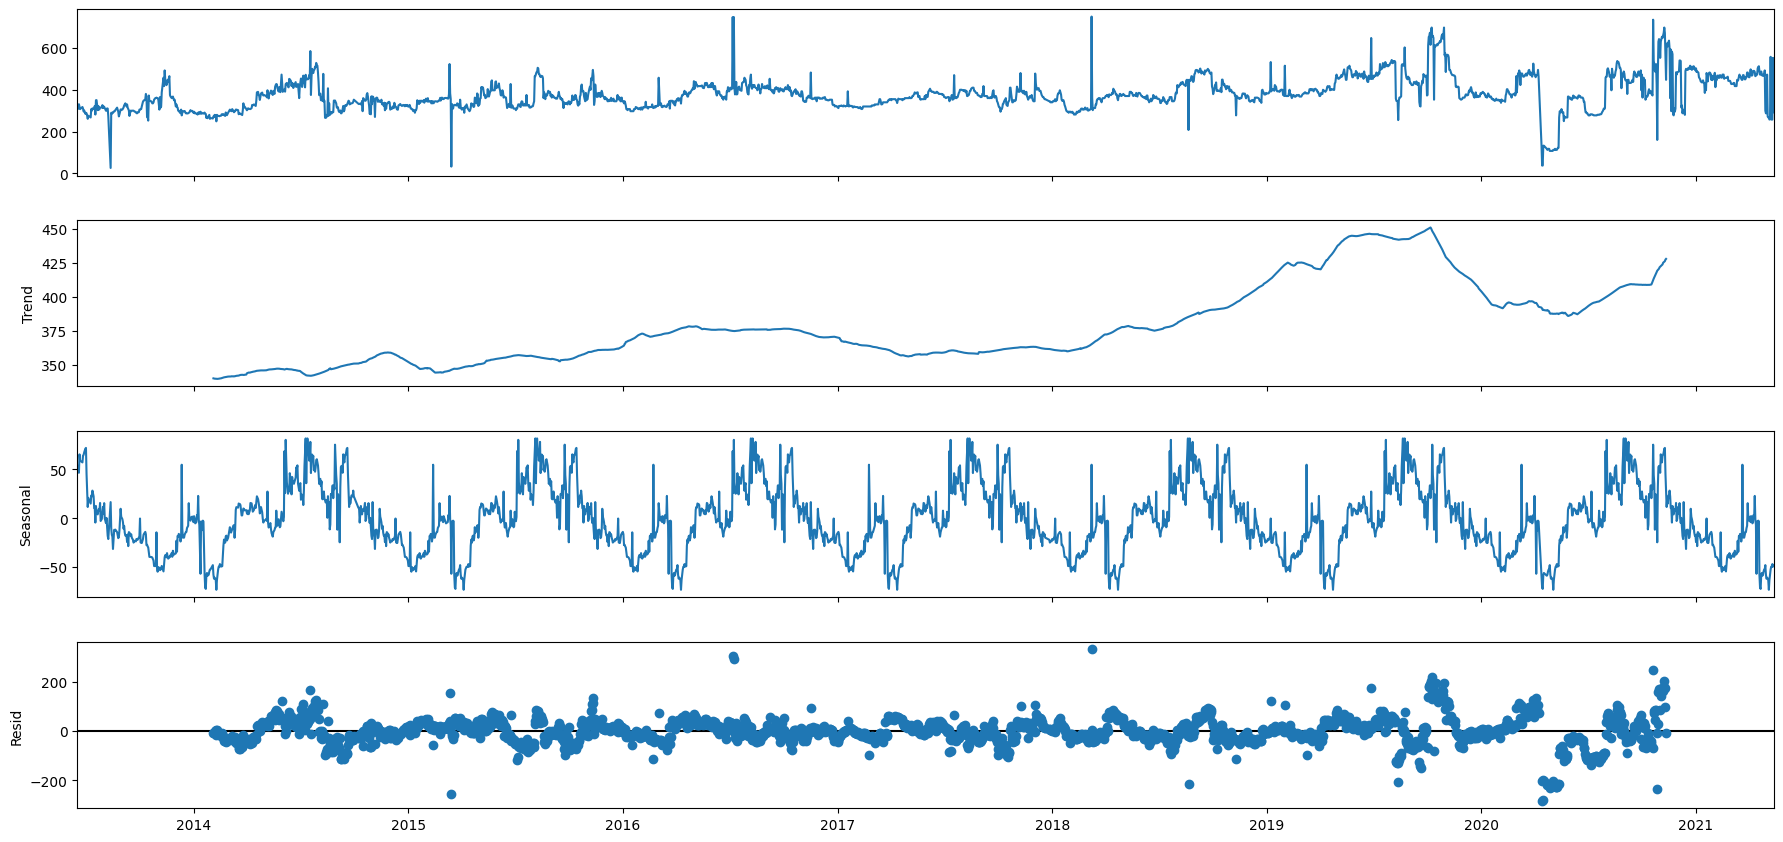

In [57]:
fig = signal_decomposed.plot()
fig.set_size_inches((20, 9))
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_daily_sum, test_size=0.2, shuffle=False, random_state=42)

print("Tamaño del conjunto de entrenamiento:", train_data.shape)
print("Tamaño del conjunto de prueba:", test_data.shape)

Tamaño del conjunto de entrenamiento: (2200, 1)
Tamaño del conjunto de prueba: (551, 1)


In [59]:
train_data['set'] = 'Train'
test_data['set'] = 'Test'

target = "y"
combined_data = pd.concat([train_data, test_data])

In [60]:
fig = px.line(combined_data, x = combined_data.index, y=target,
              title='Suma de promedios del precio de frutas y verduras seleccionadas a lo largo del tiempo',
              color = 'set')

fig.update_layout(xaxis_title='Fecha',
                  yaxis_title='Suma Precio Promedio')

fig.show()

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [61]:
#instalamos prophet
!pip install prophet

In [62]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [63]:
# Respuesta
X_train = train_data.drop(columns = ['set'])
y_train = train_data[target].copy()

X_test = test_data.drop(columns = ['set'])
y_test = test_data[target].copy()

In [64]:
df_train = X_train.reset_index()
df_test = X_test.reset_index()

**2. Modelo y entrenamiento**

In [83]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/g4e5tmog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/kzyo1f_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68147', 'data', 'file=/tmp/tmp95cebst6/g4e5tmog.json', 'init=/tmp/tmp95cebst6/kzyo1f_5.json', 'output', 'file=/tmp/tmp95cebst6/prophet_model44_m3utf/prophet_model-20240525024543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

**¿Qué muestra el dataframe de predicción una vez realizada la predicción?**

Muestra una cantidad 19 columnas. Se deduce que estas se encuentran relacionadas con las componentes de la predicción y sus intervalos de confianza.

**¿Qué siginifican las distintas columnas?**

- **ds:** Corresponde a la columna de las fechas.
- **trend:** Corresponde a la componente de tendencia de los datos predichos.
- **yhat_lower** y **yhat_upper:** Corresponden a las columnas que muestran los intervalos de confianza inferior y superior de la predicción completa.
- **trend_lower** y **trend_upper:** Estas columnas muestran los intervalos de confianza para el componente de tendencia.
- **additive_terms:** Esta columna corresponde a la suma de todos los términos aditivos de la predicción (Como lo es la estacionalidad y otros).
- **additive_terms_lower** y **additive_terms_upper:** Corresponden a las columnas que muestran los intervalos de confianza de los términos aditivos.
- **weekly:** Corresponde a la componente estacional semanal de la serie predicha, corresponde a la repetición semanal que tiene la serie.
- **weekly_lower** y **weekly_upper:** Muestran los intervalos de confianza para la componente estacional semanal.
- **yearly:** Es análoga a la columna "weekly", corresponde a la componente estacional anual de la serie predicha, corresponde a la repetición anual que tiene la serie.
- **yearly_lower** y **yearly_upper:** Corresponden a los intervalos de confianza para la componente estacional anual.
- **multiplicative_terms:** Corresponde a los términos multiplicativos.
- **multiplicative_terms_lower** y **multiplicative_terms_upper:** Son los intervalos de confianza de los términos multiplicativos.
- **yhat:** Corresponde a la predicción completa, muestra los valores predichos de la serie temporal. Es la combinación de todos los componentes sumados o multiplicados según corresponda.

In [84]:
# Respuesta
future = model.make_future_dataframe(periods=len(y_test))
forecast = model.predict(future)

In [85]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-06-16,286.656750,247.695109,359.428490,286.656750,286.656750,16.232119,16.232119,16.232119,-1.729434,-1.729434,-1.729434,17.961554,17.961554,17.961554,0.0,0.0,0.0,302.888869
1,2013-06-17,286.857257,243.321149,356.371560,286.857257,286.857257,15.590492,15.590492,15.590492,-1.443185,-1.443185,-1.443185,17.033677,17.033677,17.033677,0.0,0.0,0.0,302.447749
2,2013-06-18,287.057764,244.873006,356.072489,287.057764,287.057764,14.867733,14.867733,14.867733,-1.257620,-1.257620,-1.257620,16.125352,16.125352,16.125352,0.0,0.0,0.0,301.925496
3,2013-06-19,287.258270,249.375111,354.752439,287.258270,287.258270,16.644903,16.644903,16.644903,1.401355,1.401355,1.401355,15.243548,15.243548,15.243548,0.0,0.0,0.0,303.903173
4,2013-06-20,287.458777,246.068734,354.297948,287.458777,287.458777,14.241330,14.241330,14.241330,-0.154978,-0.154978,-0.154978,14.396308,14.396308,14.396308,0.0,0.0,0.0,301.700107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,2021-04-27,619.584466,556.768459,689.603733,581.325846,655.565440,5.102957,5.102957,5.102957,-1.257620,-1.257620,-1.257620,6.360576,6.360576,6.360576,0.0,0.0,0.0,624.687423
2747,2021-04-28,619.829904,555.766567,693.047370,581.479064,655.910641,9.283285,9.283285,9.283285,1.401355,1.401355,1.401355,7.881930,7.881930,7.881930,0.0,0.0,0.0,629.113189
2748,2021-04-29,620.075341,559.620687,694.289026,581.632281,656.301097,9.283086,9.283086,9.283086,-0.154978,-0.154978,-0.154978,9.438063,9.438063,9.438063,0.0,0.0,0.0,629.358427
2749,2021-04-30,620.320779,564.350084,702.134999,581.723796,656.619327,15.025680,15.025680,15.025680,3.999756,3.999756,3.999756,11.025925,11.025925,11.025925,0.0,0.0,0.0,635.346459


**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

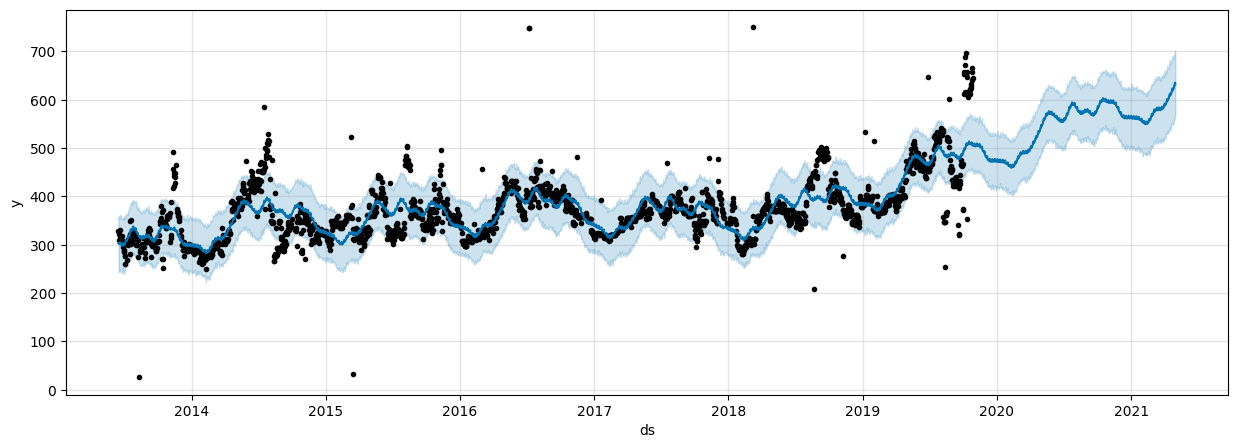

In [86]:
# plot forecast, estático.
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

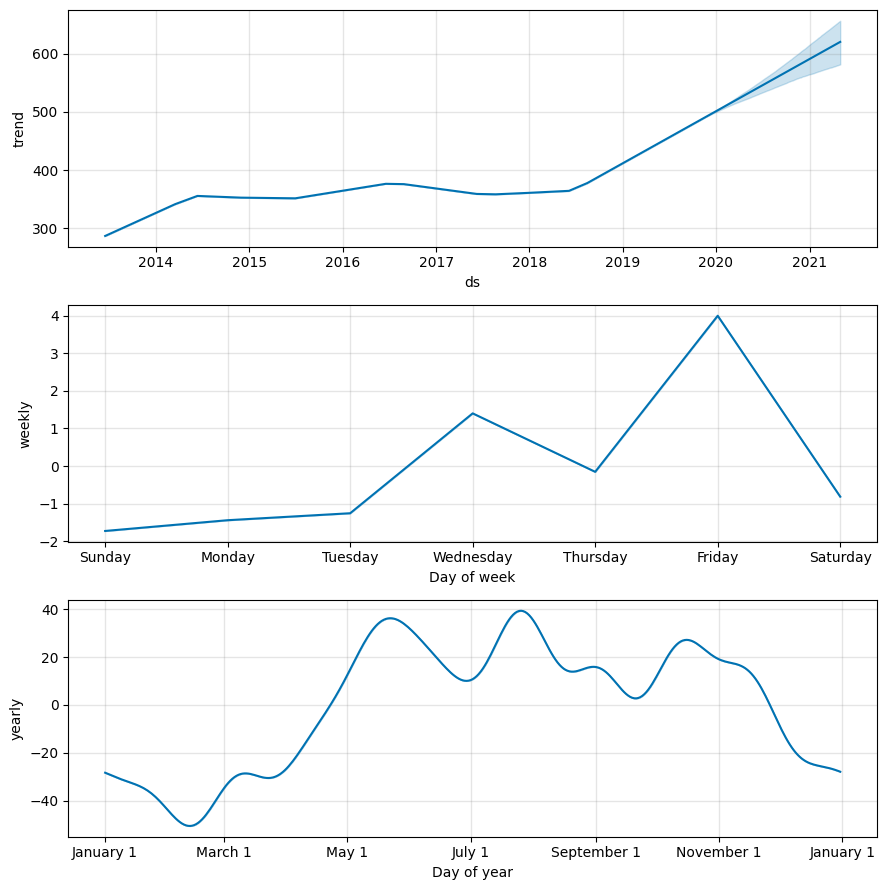

In [87]:
# descomposición por componentes, estático
fig = model.plot_components(forecast,'dataframe de predicción')

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [88]:
y_pred = forecast['yhat'].values

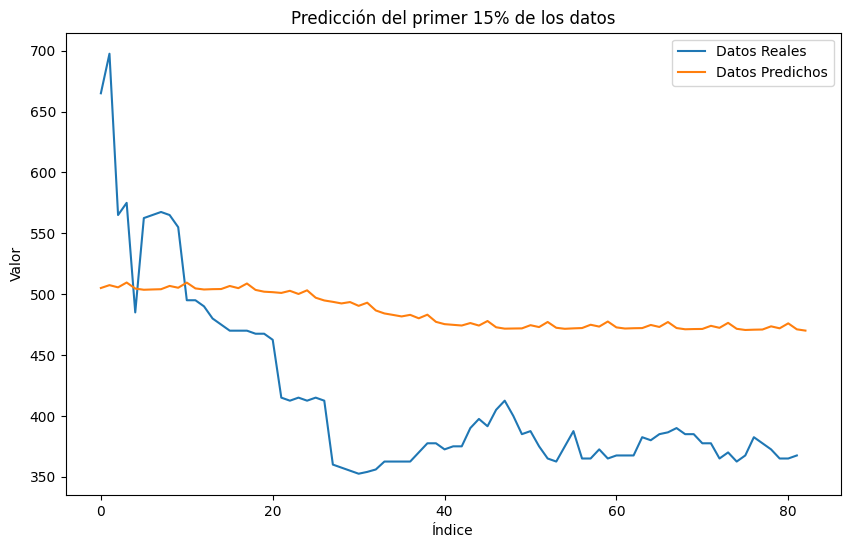

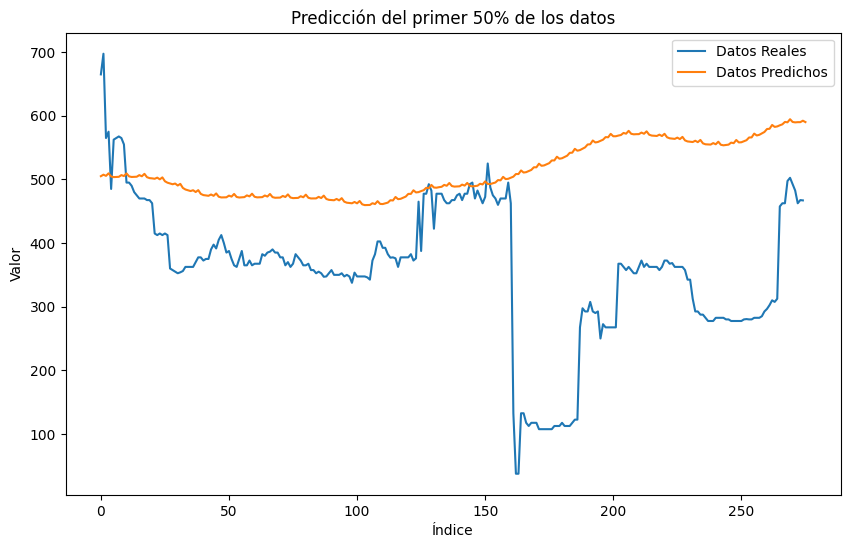

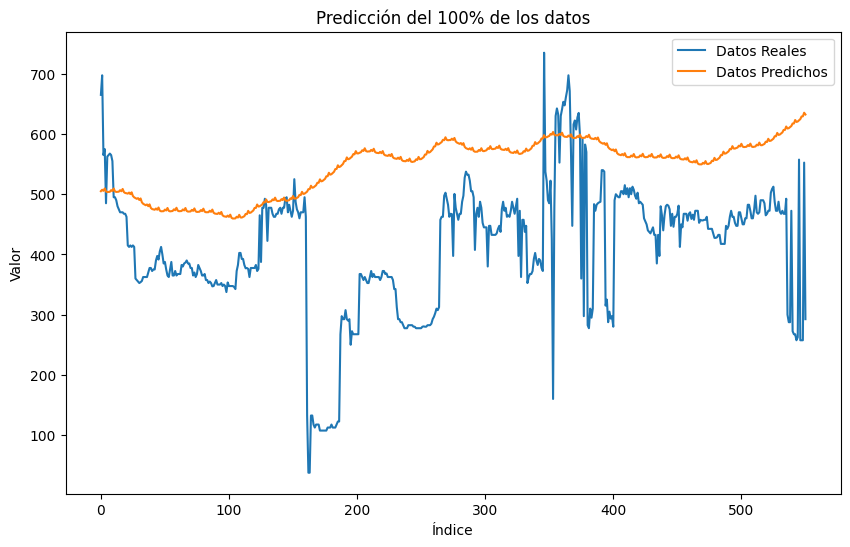

In [89]:
# Respuesta

#Visualización del 15% de los datos
plt.figure(figsize=(10, 6))
plt.plot(y_test[:int(len(y_test)*0.15)].values,  label='Datos Reales')
plt.plot(y_pred[len(y_pred)-(len(y_test)): len(y_pred)-int(len(y_test)*0.85)], label='Datos Predichos')
plt.title('Predicción del primer 15% de los datos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

#Visualización del 50% de los datos
plt.figure(figsize=(10, 6))
plt.plot(y_test[:int(len(y_test)*0.50)].values,  label='Datos Reales')
plt.plot(y_pred[len(y_pred)-(len(y_test)): len(y_pred)-int(len(y_test)*0.50)], label='Datos Predichos')
plt.title('Predicción del primer 50% de los datos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

#Visualización del 100% de los datos
plt.figure(figsize=(10, 6))
plt.plot(y_test.values,  label='Datos Reales')
plt.plot(y_pred[-(len(y_test)):], label='Datos Predichos')
plt.title('Predicción del 100% de los datos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [90]:
#Calcular métricas de error (RMSE, MAE, MAPE)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred[-(len(y_test)):]))
mae_test = mean_absolute_error(y_test, y_pred[-(len(y_test)):])
mape_test = mean_absolute_percentage_error(y_test, y_pred[-(len(y_test)):]) * 100
print(f'RMSE Test: {rmse_test:.2f}')
print(f'MAE Test: {mae_test:.2f}')
print(f'MAPE Test: {mape_test:.2f}')

RMSE Test: 174.75
MAE Test: 142.65
MAPE Test: 54.23


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [91]:
# Respuesta

chris = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.to_datetime(['2014-12-24', '2014-12-25',
                        '2015-12-24', '2015-12-25',
                        '2016-12-24', '2016-12-25',
                        '2017-12-24', '2017-12-25',
                        '2018-12-24', '2018-12-25',
                        '2019-12-24', '2019-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

new_year = pd.DataFrame({
  'holiday': 'new_year',
  'ds': pd.to_datetime(['2014-01-01', '2015-01-01',
                        '2016-01-01', '2017-01-01',
                        '2018-01-01', '2019-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})

pascua = pd.DataFrame({
  'holiday': 'pascua',
  'ds': pd.to_datetime(['2014-04-20', '2015-04-05',
                        '2016-03-27', '2017-04-16',
                        '2018-04-01', '2019-04-21']),
  'lower_window': 0,
  'upper_window': 1,
})

holidays = pd.concat((chris, new_year, pascua))

model = Prophet(holidays=holidays)

**2. Predecir**

In [92]:
# Respuesta
forecast = model.fit(df_train).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/w37n3zhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/9_cv8z79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86222', 'data', 'file=/tmp/tmp95cebst6/w37n3zhy.json', 'init=/tmp/tmp95cebst6/9_cv8z79.json', 'output', 'file=/tmp/tmp95cebst6/prophet_modelj1w1jxtv/prophet_model-20240525024647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:46:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Resultados**

In [93]:
# Respuesta

forecast[(forecast['christmas'] + forecast['new_year'] + forecast['pascua']).abs() > 0][
        ['ds', 'christmas', 'new_year', 'pascua']][-10:]

,ds,christmas,new_year,pascua
1892,2018-12-24,2.865322,0.000000,0.000000
1893,2018-12-25,4.179855,0.000000,0.000000
1894,2018-12-26,1.314532,0.000000,0.000000
1900,2019-01-01,0.000000,-3.517035,0.000000
1901,2019-01-02,0.000000,-3.774623,0.000000
2009,2019-04-21,0.000000,0.000000,5.022510
2010,2019-04-22,0.000000,0.000000,0.147605
2256,2019-12-24,2.865322,0.000000,0.000000
2257,2019-12-25,4.179855,0.000000,0.000000
2258,2019-12-26,1.314532,0.000000,0.000000


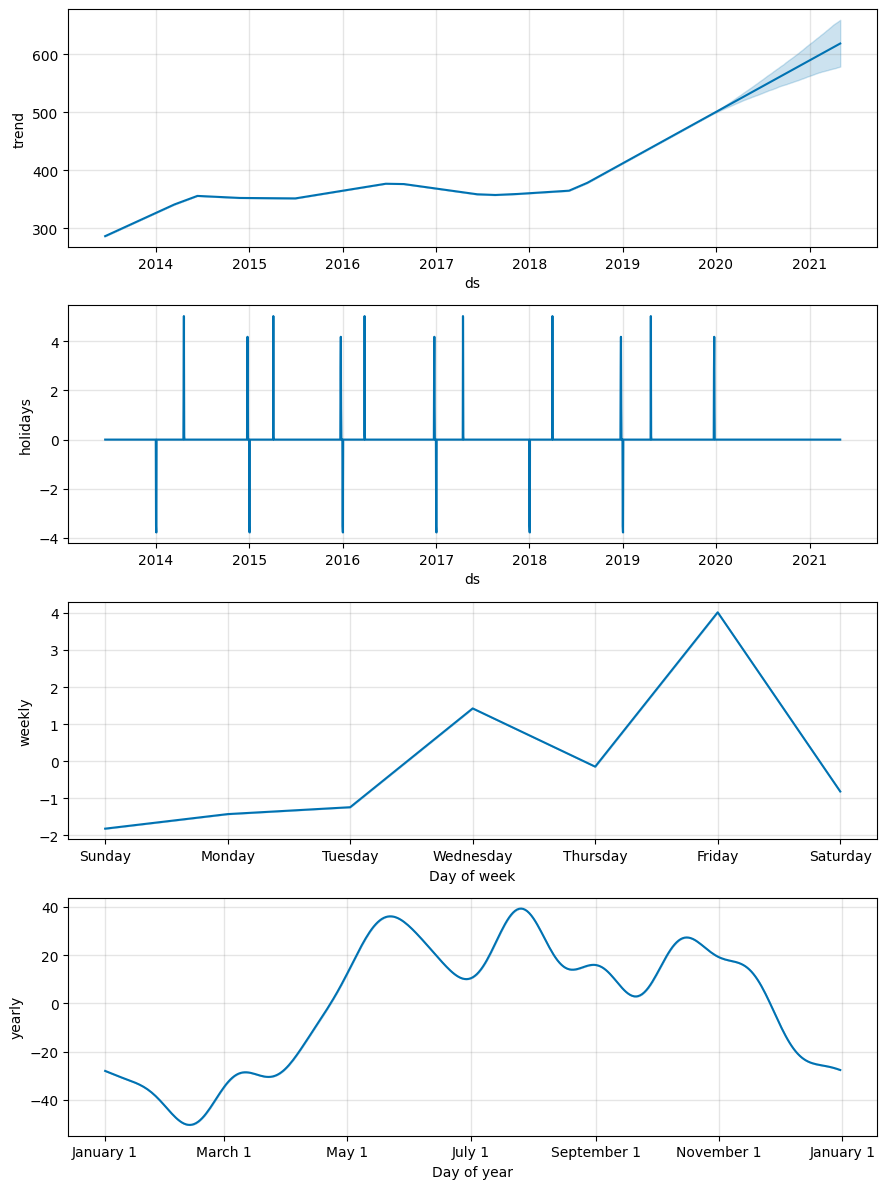

In [94]:
#plot de componentes
fig = model.plot_components(forecast,'dataframe de predicción con festividades')

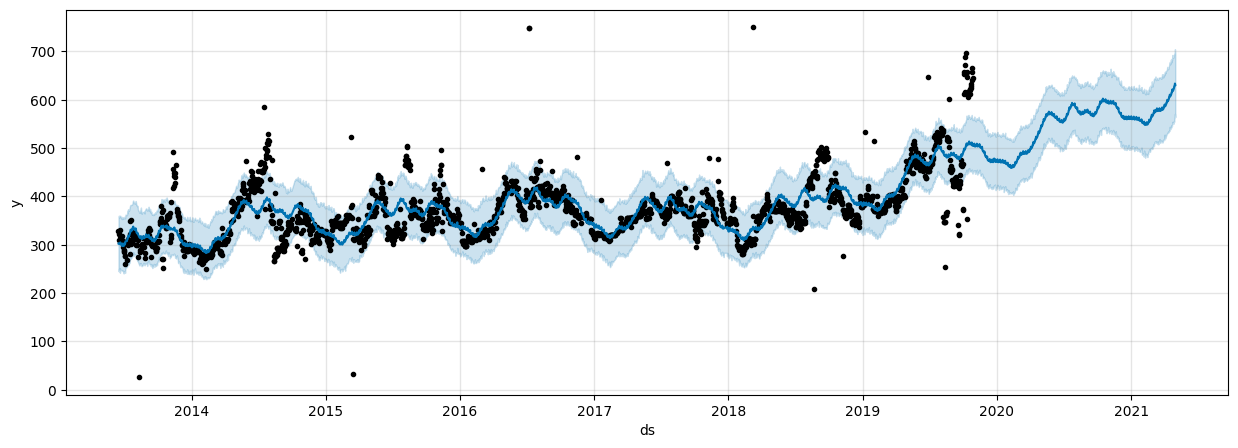

In [95]:
#plot de predicción
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

In [96]:
#resultados
y_pred_fes = forecast['yhat'].values

rmse_fes = np.sqrt(mean_squared_error(y_test, y_pred_fes[-(len(y_test)):]))
mae_fes = mean_absolute_error(y_test, y_pred_fes[-(len(y_test)):])
mape_fes = mean_absolute_percentage_error(y_test, y_pred_fes[-(len(y_test)):]) * 100
print(f'RMSE Test sin festividades: {rmse_test:.2f}')
print(f'RMSE Test con destividades: {rmse_fes:.2f}')
print(f'MAE Test sin festividades: {mae_test:.2f}')
print(f'MAE Test con festividades: {mae_fes:.2f}')
print(f'MAPE Test sin festividades: {mape_test:.2f}')
print(f'MAPE Test con festividades: {mape_fes:.2f}')

RMSE Test sin festividades: 174.75
RMSE Test con destividades: 173.88
MAE Test sin festividades: 142.65
MAE Test con festividades: 141.69
MAPE Test sin festividades: 54.23
MAPE Test con festividades: 53.96


**¿Son más precisas las predicciones?**

Efectivamente, se tiene que las predicciones al agregar fechas importantes como navidad, año nuevo y pascua tiene una mayor precisión, pero esta diferencia no es de gran magnitud. Esto puede deberse a que las fechas agregadas podrían no afectar tanto al precio de las frutas y verduras como se pensaba.

**¿Qué otro festividad podría afectar a los precios de las frutas y verduras?**

Podrían afectar las fiestas patrias, dado que es una celebración donde la alimentación y comida es parte importante. Igualmente, podría considerarse festividades como dia de la madre y día del padre. También, se podrían considerar los black fridays y los cyber days, dabido que durante esas fechas existe un aumento en la demanda en general.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [97]:
# Respuesta

def inv(fecha):
    comienzo_inv = pd.Timestamp(year=fecha.year, month=6, day=21)
    final_inv = pd.Timestamp(year=fecha.year, month=9, day=21)
    if comienzo_inv <= fecha <= final_inv:
      return 1
    else:
      return 0

df_train['invierno'] = df_train['ds'].apply(inv)
df_test['invierno'] = df_test['ds'].apply(inv)
#y_test['invierno'] = df_test['invierno']

In [98]:
model = Prophet(holidays=holidays)
model.add_regressor('invierno')
model.fit(df_train)
future['invierno'] = future['ds'].apply(inv)
#future = model.make_future_dataframe(periods=len(y_test))

forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/9te5afxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp95cebst6/sh5t37qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36306', 'data', 'file=/tmp/tmp95cebst6/9te5afxp.json', 'init=/tmp/tmp95cebst6/sh5t37qu.json', 'output', 'file=/tmp/tmp95cebst6/prophet_modelnd12hh2z/prophet_model-20240525024802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


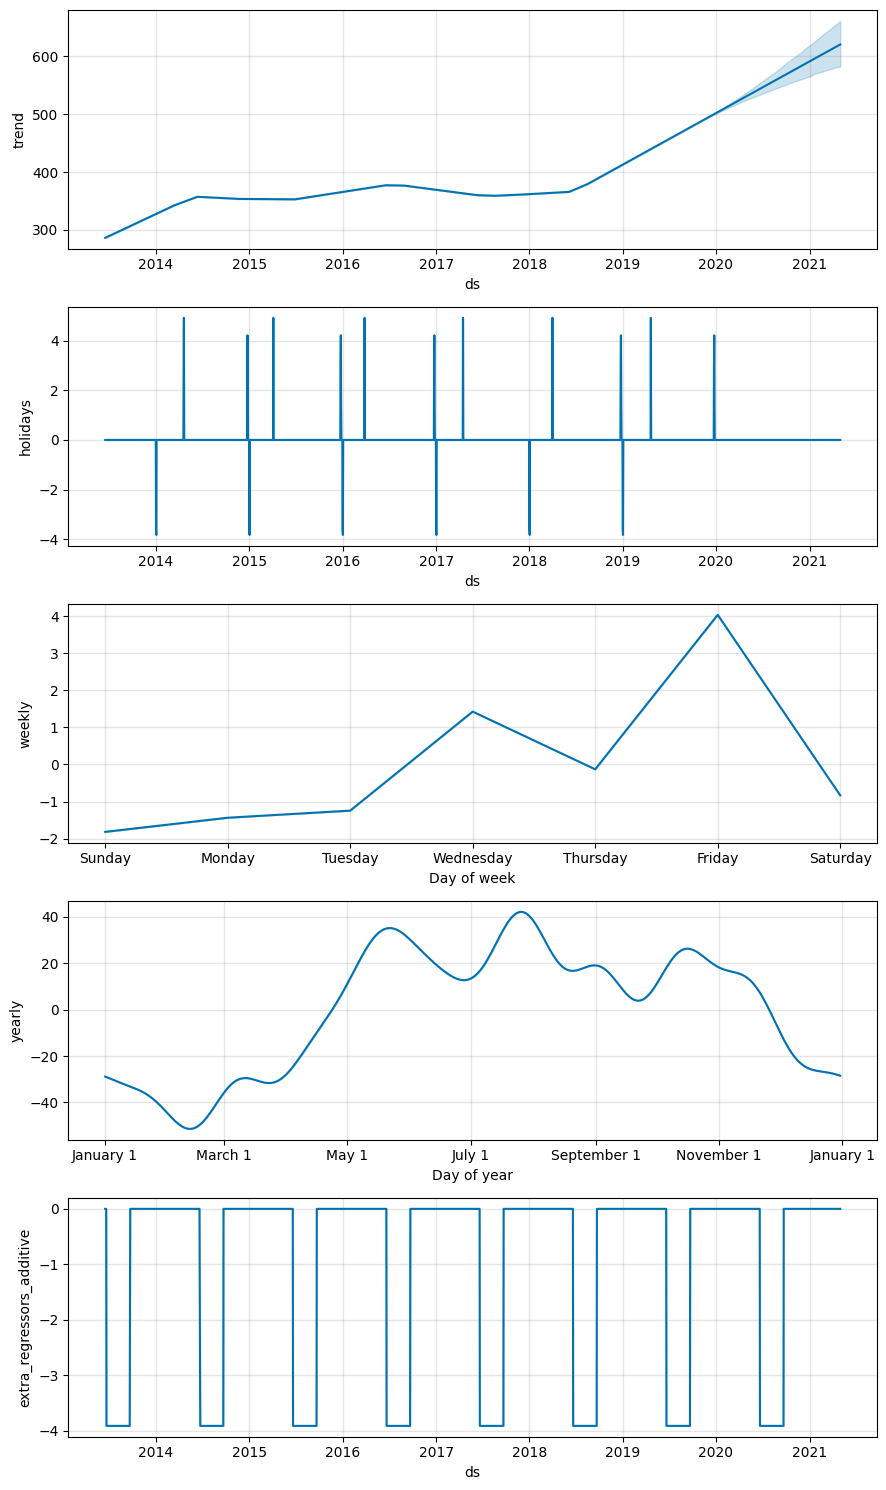

In [99]:
fig = model.plot_components(forecast,'dataframe de predicción con regresor')

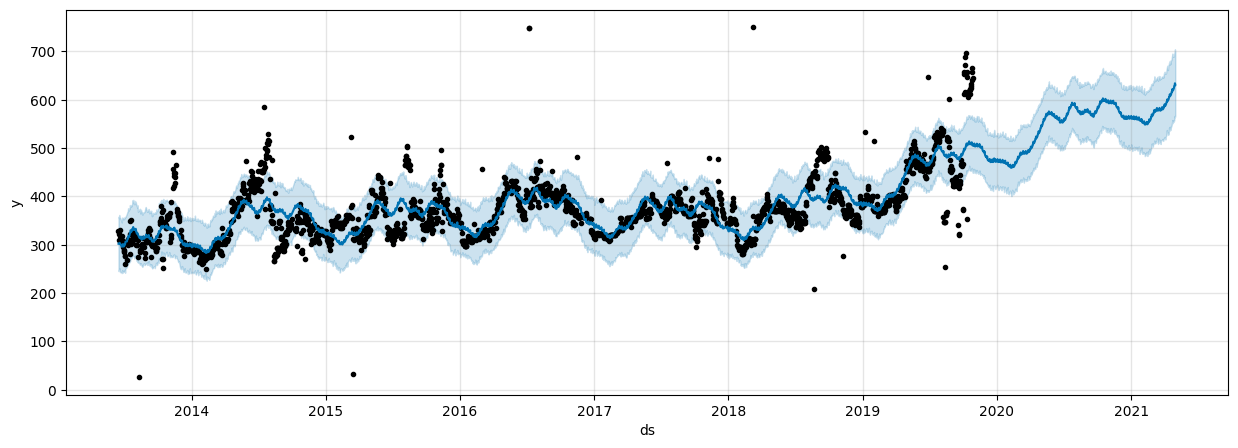

In [100]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

In [101]:
y_test

ds
2019-10-29    665.0
2019-10-30    697.5
2019-10-31    565.0
2019-11-01    575.0
2019-11-02    485.0
              ...  
2021-05-09    257.5
2021-05-10    257.5
2021-05-11    257.5
2021-05-12    552.5
2021-05-13    292.5
Name: y, Length: 551, dtype: float64

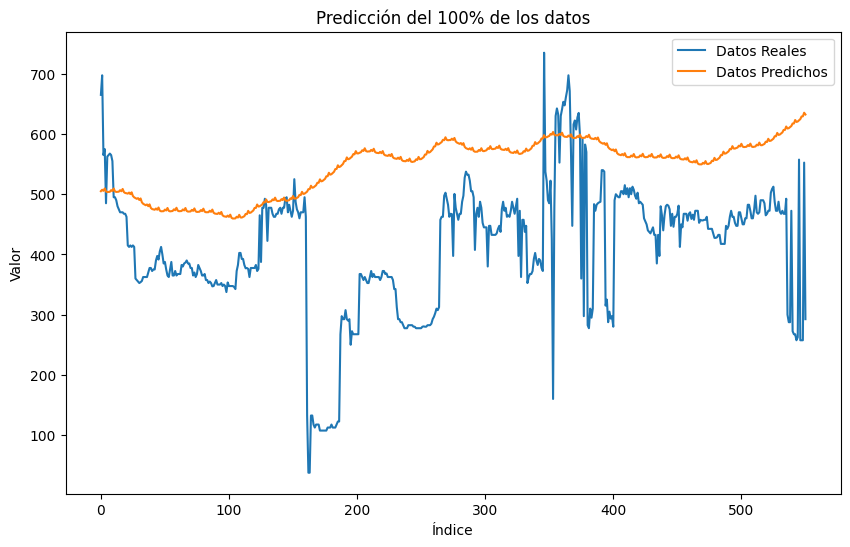

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values,  label='Datos Reales')
plt.plot(y_pred[-(len(y_test)):], label='Datos Predichos')
plt.title('Predicción del 100% de los datos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [103]:
#resultados
y_pred_reg = forecast['yhat'].values

rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg[-(len(y_test)):]))
mae_reg = mean_absolute_error(y_test, y_pred_reg[-(len(y_test)):])
mape_reg = mean_absolute_percentage_error(y_test, y_pred_reg[-(len(y_test)):]) * 100

In [104]:
print(f'RMSE Test sin festividades: {rmse_test:.2f}')
print(f'RMSE Test con festividades: {rmse_fes:.2f}')
print(f'RMSE Test con regresor: {rmse_reg:.2f}')
print(f'MAE Test sin festividades: {mae_test:.2f}')
print(f'MAE Test con festividades: {mae_fes:.2f}')
print(f'MAE Test con regresor: {mae_reg:.2f}')
print(f'MAPE Test sin festividades: {mape_test:.2f}')
print(f'MAPE Test con festividades: {mape_fes:.2f}')
print(f'MAPE Test con regresor: {mape_reg:.2f}')

RMSE Test sin festividades: 174.75
RMSE Test con festividades: 173.88
RMSE Test con regresor: 174.25
MAE Test sin festividades: 142.65
MAE Test con festividades: 141.69
MAE Test con regresor: 142.10
MAPE Test sin festividades: 54.23
MAPE Test con festividades: 53.96
MAPE Test con regresor: 54.07


# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [3]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357221 sha256=356967a3987720fa630c5ef314b19f8d0673eedcd79292358d92a5169f68b9ca
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [4]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [5]:
# Carga de datos
from google.colab import files
uploaded = files.upload()

Saving ratings_Electronics.parquet to ratings_Electronics.parquet


In [6]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


In [8]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164007 entries, 189 to 7824221
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  164007 non-null  int64  
 1   prod_id  164007 non-null  int64  
 2   rating   164007 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.0 MB


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [10]:
# Respuesta
usuarios = df['user_id'].nunique()
productos = df['prod_id'].nunique()

print(f'El dataframe cuenta con {usuarios} usuarios únicos')
print(f'El dataframe cuenta con {productos} productos únicos')

El dataframe cuenta con 8014 usuarios únicos
El dataframe cuenta con 6727 productos únicos


Verificar que no hayan valores nulos

In [11]:
# Respuesta
print(f"Cantidad de valores nulos por columna: \n{df.isna().sum()}")

Cantidad de valores nulos por columna: 
user_id    0
prod_id    0
rating     0
dtype: int64


Graficar distribución de los ratings

In [12]:
# Primero vemos en que rango se valoran los productos
df['rating'].unique()

array([5., 4., 3., 1., 2.])

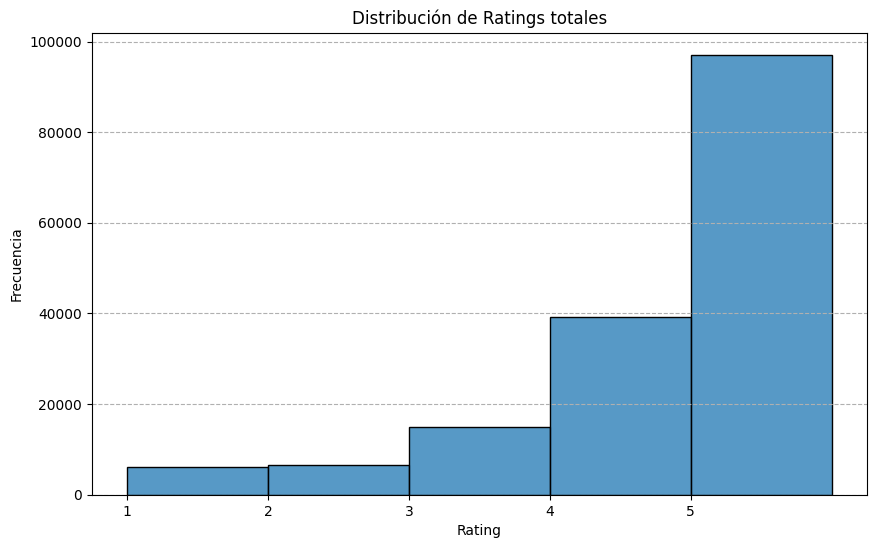

In [13]:
# Respuesta
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=range(1, 7), kde=False)
plt.title('Distribución de Ratings totales')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--')
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [14]:
# Respuesta
group_usuario = df.groupby('user_id').size().sort_values(ascending=False)
print('Top 5 de usuarios con mayores interacciones')
group_usuario.head(5)

Top 5 de usuarios con mayores interacciones


user_id
6703    283
5732    217
6273    206
1414    199
4665    179
dtype: int64

In [17]:
group_usuario.tail(5)

user_id
167     1
628     1
4754    1
7808    1
1589    1
dtype: int64

In [16]:
group_producto = df.groupby('prod_id').size().sort_values(ascending=False)
print('Top 5 de productos con mayores interacciones')
group_producto.head(5)

Top 5 de productos con mayores interacciones


prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
dtype: int64

In [18]:
group_producto.tail(5)

prod_id
5142    10
5132    10
1462    10
1468    10
3363    10
dtype: int64

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. Se puede observar que los usuarios valoran los diferentes productos en un rango de 1 a 5, siendo esta última la valoración con más frecuencia en la base de datos. Luego el ranking 4 con menos de la mitad de las valoraciones que tienen un ranking  de 5. Este fenómeno se repite de forma que se observa una distribución ascendente a medida que el ranking es más alto.

2. De los 164007 datos que se tienen, existen 8014 usuarios únicos y 6727 productos únicos. De esto se puede determinar que cada usuario puede hacer más de una valoración y asimismo los productos pueden ser valorados por distintos usuarios a la vez.

3. Respecto a las valoraciones por usuario se puede observar que la mayor
   cantidad de interacciones de un mismo usuario corresponde a 283, siendo el mínimo de interacciones realizadas es igual a 1.

   Respecto a las valoraciones por producto se puede observar que la mayor cantidad de interacciones de un mismo producto corresponde a 611, es decir, el producto más popular tiene 611 valoraciones. En cambio, los productos menos populares tienen un mínimo de 10 interacciones realizadas.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [19]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [20]:
from surprise.model_selection import train_test_split

# Respuesta
train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [23]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta
normal_predictor = NormalPredictor()
normal_predictor.fit(train_set)
predicciones = normal_predictor.test(test_set)
predictions_df = pd.DataFrame([[prediction.uid, prediction.iid, prediction.r_ui, prediction.est] for prediction in predicciones], columns=['user_id', 'prod_id', 'ranking', 'estimated_rating'])
predictions_df

,user_id,prod_id,ranking,estimated_rating
0,2170,4363,5.0,4.404663
1,6665,5810,4.0,4.576211
2,3315,5232,4.0,5.000000
3,2051,2892,5.0,5.000000
4,6170,2929,5.0,3.137026
...,...,...,...,...
49198,3304,4965,5.0,3.655335
49199,7097,4275,5.0,4.592224
49200,7911,5370,2.0,3.901677
49201,6266,5986,5.0,4.901138


In [24]:
# Evaluar con MAE
from surprise.accuracy import mae
mae(predicciones)

MAE:  0.9916


0.9916374867299242

In [25]:
# Evaluar con MSE
from surprise.accuracy import mse
mse(predicciones)

MSE: 1.7822


1.7821661012378776

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [26]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings = [pred for pred in predictions if pred.uid == user]

  # Ordenar las predicciones
  sorted_predicted_ratings = sorted(predicted_ratings, key=lambda x: x.est, reverse=True)
  top_k_predictions = [(pred.iid, pred.est) for pred in sorted_predicted_ratings[:k]]

  return top_k_predictions

In [29]:
# KNN enfocado en el Usuario
sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)
# entrenar
user_model.fit(train_set)
#predecir en dataframe de testeo
predictions =  user_model.test(test_set)
# retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions_df_um = pd.DataFrame([[prediction.uid, prediction.iid, prediction.est] for prediction in predictions], columns=['user_id', 'prod_id', 'estimated_rating'])
# obtener mse
mae(predictions)
mse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7646
MSE: 1.2122


1.212159526775385

In [28]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[(2679, 5),
 (1326, 4.799755049750801),
 (4650, 4.399861310283875),
 (1692, 4.333333333333333),
 (4363, 4.199459547276517)]

In [30]:
# KNN enfocado en el Producto
sim_options = {'name': 'cosine',
               'user_based': False}

# algoritmo base a usuario.
item_model = KNNBasic(sim_options=sim_options)
# entrenar
item_model.fit(train_set)
#predecir en dataframe de testeo
predictions2 =  item_model.test(test_set)
# retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions_df_im = pd.DataFrame([[prediction.uid, prediction.iid, prediction.est] for prediction in predictions2], columns=['user_id', 'prod_id', 'estimated_rating'])
# obtener mse
mae(predictions2)
mse(predictions2)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7535
MSE: 1.2328


1.23280223807978

In [31]:
example = [(3, 3906, None)]
print(item_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[(2679, 5),
 (1326, 4.799755049750801),
 (4650, 4.399861310283875),
 (1692, 4.333333333333333),
 (4363, 4.199459547276517)]

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [32]:
# Respuesta

model_svd = SVD() # n_factor=100
model_svd.fit(train_set)
# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions3 = model_svd.test(test_set)
# retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions_df_svd = pd.DataFrame([[prediction.uid, prediction.iid, prediction.est] for prediction in predictions3], columns=['user_id', 'prod_id', 'estimated_rating'])
# obtener mse
mae(predictions3)
mse(predictions3)


MAE:  0.6947
MSE: 0.9113


0.9113254379719341

In [39]:
example = [(3, 3906, None)]
print(model_svd.test(example))
get_user_top_k(predictions3, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.040518797128642, details={'was_impossible': False})]


[(1692, 4.941019908699162),
 (1326, 4.924064988893118),
 (5990, 4.877296953396007),
 (4650, 4.8686209655586525),
 (3595, 4.852477092531185)]

In [35]:
from surprise.model_selection import GridSearchCV
param_grid = {"n_factors": [25, 50, 100]}
grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"])

grid_search.fit(dataset)
pd.DataFrame.from_dict(grid_search.cv_results)[[
    "mean_test_rmse", "mean_test_mae", "param_n_factors"]].sort_values("mean_test_rmse")


,mean_test_rmse,mean_test_mae,param_n_factors
0,0.949949,0.685371,25
1,0.952184,0.687327,50
2,0.955431,0.691057,100


In [38]:
grid_search.best_params['rmse']

{'n_factors': 25}

- ¿En qué se diferencia este tipo de modelos de los
  modelos basados en memoria?
  
  R: Los modelos basados en memoria utilizan directamente los datos de las interacciones reales usuario-producto para predecir nuevas recomendaciones basandose principalmente en la búsqueda de vecinos cercanos. En cambio, los modelos basados en modelo intentan modelar las interacciones usuario-producto para hacer predicciones con un enfoque más generativo, por lo que suelen ser más precisos y pueden capturar patrones más complejos que los basados en memoria.

- ¿Qué significa el parámetro `num_factors`? ¿De qué
  manera podría impactar en el ajuste del modelo?
  
  R: Este parámetro corresponde al número de factores latentes que capturan las características subyacentes de los usuarios y productos. Por defecto el modelo  SVD tienen `num_factors = 100`. Pero al realizar una Grid search entre [25,50,100] sobre los datos, se puede ver que el mejor modelo resulta con `num_factors = 25` para este caso, según la métrica rmse. Por lo tanto, este parámetro es relevante segun los datos que se estan utilizando, ya que al ser demasiado pequeño puede que no logre capturar correctamente las relaciones generando un Underfitting. En cambio, si este valor es muy grande puede que el modelo se adapte muy bien a los datos de entrenamiento y no logre generalizar con datos nuevos, generando Overfitting.

- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$?
  ¿Qué cuidado se debe tener al utilizarlos?

   * $\mu$: representa la media de los ratings
   * $b_u$: representan los coeficientes de sesgo para el usuario
   * $b_i$: representa los coeficientes de sesgo para el producto

   R: Estos corresponden a términos adicionales dentro de la estimación del modelo de factorización de matrices y pueden mejorar significativamente la capacidad del modelo, siempre y cuando se tenga en cuenta la regularización de estos parámetros para evitar problemas de sobreajuste.

- Obtenga el error cuadrático medio de sus   recomedaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?  

  R: Se puede observar que el modelo SVD obtiene un mse de 0.9113, el cual es mucho menor que el obtenido en el baseline de 1.7822. Lo mismo se observa con el mae. Esto da a entender que el modelo SVD tiene un mejor rendimiento con respecto al baseline.

- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?

  R: A continuacion se muestran la predicción pedida para los distintos modelos implementados.

  * Filtro Colaborativo KNN enfocado en el Usuario: 3.38
  * Filtro Colaborativo KNN enfocado en el Producto: 2.5
  * Filtro Colaborativo basado en modelo: 3.04

  Se puede ver que los tres modelos dan distintas predicciones para el mismo caso. Sin embargo, al aproximar los resultados, estos dan un rating de 3.

- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

  R: Se puede ver que en los tres modelos las mejores 5 recomendaciones dan un rating estimado cercano a 5, que corresponde a lo esperado.

  Con respecto al primer puesto, todos los modelos indican un producto distinto. En cuanto al segundo puesto, los tres modelos indican al producto 1326, aunque el modelo KNN enfocado en el usuario predice un ranking menor que los otros dos modelos. En cuanto al tercer puesto, los modelos KNN enfocado en el producto y SVD dan como resultado el mismo producto. Esto mismo ocurre con el cuarto y quinto puesto.

  Se observa que en general KNN enfocado en el producto y SVD dan resultados bastante similares, mientras que KNN enfocado en el usuario los entrega en distintos orden de preferencia.

  

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
  
  Los modelos KNN enfocado en el producto y SVD entregan métricas similares. Cabe destacar que el modelo SVD esta entrenado por defaul con 100 factores latentes, pero como se mostró en el grid search, un SVD entrenado con 25 factores latentes entrega un mejor rendimiento y por lo tanto podría superar las métricas alcanzadas por el modelo KNN.

* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

  * Una de las mejoras es disminuir el número de factores latentes del modelo SVD, como se mencionó anteriormente. De la misma forma se podría utilizar otros modelos y optimizar sus parámetros.
  
  * También se podrían obtener mejores resultados al  incluir informacion adicional sobre las peliculas (actores, año de estreno, género, descripción, etc.) y de los usuarios (edad, género, ubicación geográfica, ocupación, etc.). Esto permitiría complejizar los modelos para que logren capturar mejor las relaciones y de esta forma entreguen mejores recomendaciones.